In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor,plot_importance
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [2]:
X=pd.read_csv("../input/train.csv")
X_test=pd.read_csv("../input/test.csv")
#X.head()

In [3]:
#X.shape

In [4]:
#X_test.head()

In [5]:
#X_test.shape

In [6]:
#X.isnull().sum()[X.isnull().sum()>0]

In [7]:
#X_test.isnull().sum()[X_test.isnull().sum()>0]

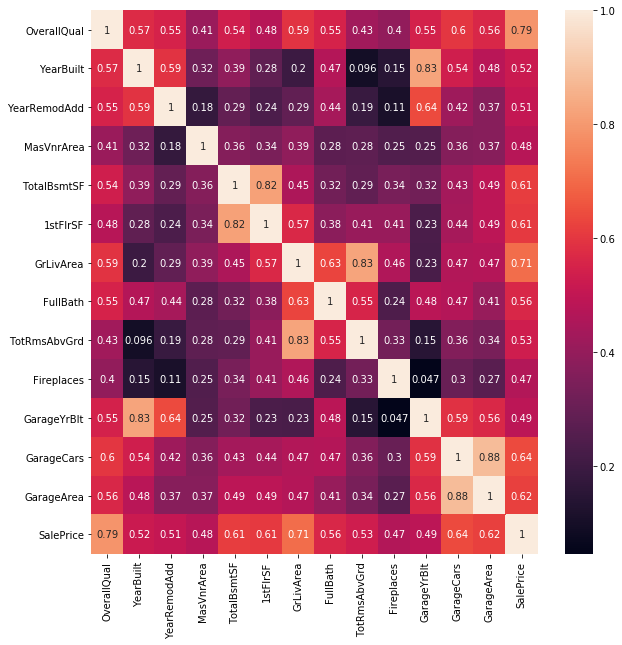

In [8]:
corr=X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(X[corr.index[abs(corr['SalePrice'])>0.4]].corr(),annot=True)

In [9]:
fillnull={ 'PoolQC':'NoPool', 'MiscFeature':'NoMisc', 'Alley':'NoAlley', 'Fence':'NoFence', 'FireplaceQu':'NoFire' }
X.fillna(fillnull,inplace=True)
#X.isnull().sum()[X.isnull().sum()>0]

In [10]:
X_test.fillna(fillnull,inplace=True)
#X_test.isnull().sum()[X_test.isnull().sum()>0]

In [11]:
#X.LotFrontage.describe()

In [12]:
X.drop(X[X.GrLivArea>4000].index.values,inplace=True)

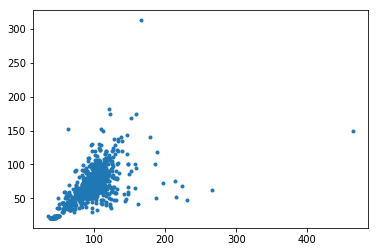

In [13]:
plt.plot((X.LotArea)**0.5,X.LotFrontage,'.')

In [14]:
X.drop(X[X.LotFrontage>300].index.values,inplace=True)
X.drop(X[X.LotArea>100000].index.values,inplace=True)
X.shape

(1451, 81)

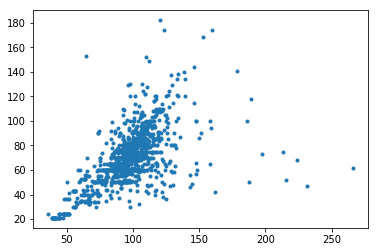

In [15]:
plt.plot((X.LotArea)**0.5,X.LotFrontage,'.')

In [16]:
reg=LinearRegression()
reg.fit(((X[(X.LotArea<35000) & (X.LotFrontage<200)].LotArea)**0.5).values.reshape(-1,1),X[(X.LotArea<35000) & (X.LotFrontage<200)].LotFrontage.values)
reg.intercept_,reg.coef_[0]

(-2.9214562238702797, 0.7608583491196361)

In [17]:
X.loc[X.LotFrontage.isnull(),'LotFrontage']=reg.predict((X[X.LotFrontage.isnull()].LotArea.values.reshape(-1,1))**0.5)
#X.head(10)

In [18]:
#X.LotFrontage.describe()

In [19]:
#X_test.LotFrontage.describe()

In [20]:
X_test.loc[X_test.LotFrontage.isnull(),'LotFrontage']=reg.predict((X_test[X_test.LotFrontage.isnull()].LotArea.values.reshape(-1,1))**0.5)
#X_test.head(10)

In [21]:
#X_test.LotFrontage.describe()

In [22]:
#X.GarageYrBlt.describe()

In [23]:
#A=pd.cut(X.GarageYrBlt,5)
#A.unique()

In [24]:
#X.GarageYrBlt=pd.cut(X.GarageYrBlt,5,labels=[1,2,3,4,5])
#X.GarageYrBlt=X.GarageYrBlt.map({1:1,2:2,3:3,4:4,5:5})
#X.GarageYrBlt.describe()

In [25]:
#X.GarageYrBlt.fillna(0,inplace=True)
#X.GarageYrBlt.describe()

In [26]:
#X_test.GarageYrBlt.describe()

In [27]:
#X_test[X_test.GarageYrBlt>2018].GarageYrBlt

In [28]:
X_test.GarageYrBlt.replace({2207:2007},inplace=True)
#X_test.GarageYrBlt.describe()

In [29]:
#X_test.GarageYrBlt=pd.cut(X_test.GarageYrBlt,(1894,1922,1944,1966,1988,2011),labels=[1,2,3,4,5])
#X_test.GarageYrBlt=X_test.GarageYrBlt.map({1:1,2:2,3:3,4:4,5:5})
#X_test.GarageYrBlt.describe()

In [30]:
#X_test.GarageYrBlt.fillna(0,inplace=True)
#X_test.GarageYrBlt.describe()

In [31]:
fillnull={ 'GarageType':'NoGarage', 'GarageFinish':'NoGarage', 'GarageQual':'NoGarage', 'GarageCond':'NoGarage' }
X.fillna(fillnull,inplace=True)
#X.isnull().sum()[X.isnull().sum()>0]

In [32]:
X_test.fillna(fillnull,inplace=True)
#X_test.isnull().sum()[X_test.isnull().sum()>0]

In [33]:
fillnull={ 'BsmtQual':'NoBsmt', 'BsmtCond':'NoBsmt', 'BsmtExposure':'NoBsmt', 'BsmtFinType1':'NoBsmt', 'BsmtFinType2':'NoBsmt' }
X.fillna(fillnull,inplace=True)
#X.isnull().sum()[X.isnull().sum()>0]

In [34]:
X_test.fillna(fillnull,inplace=True)
#X_test.isnull().sum()[X_test.isnull().sum()>0]

In [35]:
#X.MasVnrType.value_counts().plot.bar()

In [36]:
X.MasVnrType.fillna("None",inplace=True)
X_test.MasVnrType.fillna("None",inplace=True)
X.MasVnrArea.fillna(0,inplace=True)
X_test.MasVnrArea.fillna(0,inplace=True)
#X.Electrical.value_counts().plot.bar()

In [37]:
X.Electrical.fillna("SBrkr",inplace=True)
#X.isnull().sum()[X.isnull().sum()>0]

In [38]:
#X_test.isnull().sum()[X_test.isnull().sum()>0]

In [39]:
fillwithmode=['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']
for column in fillwithmode:
    mode=X[column].mode()[0]
    X_test[column].fillna(mode,inplace=True)
#X_test.isnull().sum()[X_test.isnull().sum()>0]

In [40]:
fillwithzero=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
for column in fillwithzero:
    X_test[column].fillna(0,inplace=True)
#X_test.isnull().sum()[X_test.isnull().sum()>0]

In [41]:
"""fillwithmean=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']
for column in fillwithmean:
    mean=X[column].mean()
    X_test[column].fillna(mean,inplace=True)
X_test.isnull().sum()[X_test.isnull().sum()>0]"""

"fillwithmean=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']\nfor column in fillwithmean:\n    mean=X[column].mean()\n    X_test[column].fillna(mean,inplace=True)\nX_test.isnull().sum()[X_test.isnull().sum()>0]"

In [42]:
fillwithmedian=['GarageArea','GarageCars']
for column in fillwithmedian:
    median=X[column].median()
    X_test[column].fillna(median,inplace=True)
X_test.isnull().sum()[X_test.isnull().sum()>0]

GarageYrBlt    78
dtype: int64

In [43]:
X.isnull().sum()[X.isnull().sum()>0]

GarageYrBlt    81
dtype: int64

In [44]:
#X.head()

In [45]:
#X_test.head()

In [46]:
#X.groupby('MSSubClass')['SalePrice'].mean().plot.bar()

In [47]:
"""mapping={ 20:'B',30:'F',40:'C',45:'F',50:'D',60:'A',70:'C',75:'B',80:'C',85:'D',90:'E',120:'B',150:'C',160:'E',180:'F',190:'E' }
X.MSSubClass.replace(mapping,inplace=True)
X.groupby('MSSubClass')['SalePrice'].mean().plot.bar()"""

"mapping={ 20:'B',30:'F',40:'C',45:'F',50:'D',60:'A',70:'C',75:'B',80:'C',85:'D',90:'E',120:'B',150:'C',160:'E',180:'F',190:'E' }\nX.MSSubClass.replace(mapping,inplace=True)\nX.groupby('MSSubClass')['SalePrice'].mean().plot.bar()"

In [48]:
le=LabelEncoder()
#X.loc[:,'MSSubClass']=le.fit_transform(X.MSSubClass.values)
#X.groupby('MSSubClass')['SalePrice'].mean().plot.bar()

In [49]:
"""X_test.MSSubClass.replace(mapping,inplace=True)
X_test.loc[:,'MSSubClass']=le.transform(X_test.MSSubClass.values)
X.groupby('MSZoning')['SalePrice'].mean().plot.bar()"""

"X_test.MSSubClass.replace(mapping,inplace=True)\nX_test.loc[:,'MSSubClass']=le.transform(X_test.MSSubClass.values)\nX.groupby('MSZoning')['SalePrice'].mean().plot.bar()"

In [50]:
#X_test.MSZoning.unique()

In [51]:
dummies=pd.get_dummies(X.MSZoning,prefix='MSZoning')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.MSZoning,prefix='MSZoning')
X_test=pd.concat([X_test,dummies],axis=1)
#X.head()

In [52]:
#X_test.head()

In [53]:
#X.groupby('Street')['SalePrice'].mean().plot.bar()

In [54]:
X.loc[:,'Street']=le.fit_transform(X.Street.values)
X_test.loc[:,'Street']=le.transform(X_test.Street.values)
"""dummies=pd.get_dummies(X.loc[:,['Alley','LotShape','LandContour']],prefix=['Alley','LotShape','LandContour'])
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.loc[:,['Alley','LotShape','LandContour']],prefix=['Alley','LotShape','LandContour'])
X_test=pd.concat([X_test,dummies],axis=1)
X.head()"""

"dummies=pd.get_dummies(X.loc[:,['Alley','LotShape','LandContour']],prefix=['Alley','LotShape','LandContour'])\nX=pd.concat([X,dummies],axis=1)\ndummies=pd.get_dummies(X_test.loc[:,['Alley','LotShape','LandContour']],prefix=['Alley','LotShape','LandContour'])\nX_test=pd.concat([X_test,dummies],axis=1)\nX.head()"

In [55]:
mapping={'NoAlley':0,'Grvl':1,'Pave':2}
X.Alley.replace(mapping,inplace=True)
X_test.Alley.replace(mapping,inplace=True)
mapping={'IR3':0,'IR2':1,'IR1':2,'Reg':3}
X.LotShape.replace(mapping,inplace=True)
X_test.LotShape.replace(mapping,inplace=True)
mapping={'Low':0,'HLS':1,'Bnk':2,'Lvl':3}
X.LandContour.replace(mapping,inplace=True)
X_test.LandContour.replace(mapping,inplace=True)
#X.shape,X_test.shape

In [56]:
#X_test.head()

In [57]:
X.drop('Utilities',axis=1,inplace=True)
X_test.drop('Utilities',axis=1,inplace=True)
dummies=pd.get_dummies(X.LotConfig,prefix='LotConfig')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.LotConfig,prefix='LotConfig')
X_test=pd.concat([X_test,dummies],axis=1)
X.loc[:,'LandSlope']=le.fit_transform(X.LandSlope.values)
X_test.loc[:,'LandSlope']=le.transform(X_test.LandSlope.values)
#X.head()

In [58]:
#X_test.head()

In [59]:
#X.groupby('Neighborhood')['SalePrice'].mean()

In [60]:
#X.groupby('Neighborhood')['SalePrice'].mean().describe()

In [61]:
'''mapping={}
means=X.groupby('Neighborhood')['SalePrice'].mean()
i=90000
k=50000
for j in range(len(means)):
    mapping[means.index[j]]=int((means[j]-i)/k)
mapping'''

"mapping={}\nmeans=X.groupby('Neighborhood')['SalePrice'].mean()\ni=90000\nk=50000\nfor j in range(len(means)):\n    mapping[means.index[j]]=int((means[j]-i)/k)\nmapping"

In [62]:
#X.Neighborhood.replace(mapping,inplace=True)
#X.groupby('Neighborhood')['SalePrice'].mean().plot.bar()

In [63]:
dummies=pd.get_dummies(X.Neighborhood,prefix='Neigh')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.Neighborhood,prefix='Neigh')
X_test=pd.concat([X_test,dummies],axis=1)
#X.shape,X_test.shape

In [64]:
#X_test.Neighborhood.replace(mapping,inplace=True)
dummies=pd.get_dummies(X.Condition1,prefix='Cond1')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.Condition1,prefix='Cond1')
X_test=pd.concat([X_test,dummies],axis=1)
dummies=pd.get_dummies(X.Condition2,prefix='Cond2')
X=pd.concat([X,dummies],axis=1)
X['Cond2_RRNe']=0
dummies=pd.get_dummies(X_test.Condition2,prefix='Cond2')
X_test=pd.concat([X_test,dummies],axis=1)
X_test['Cond2_RRAe']=0
X_test['Cond2_RRAn']=0
X_test['Cond2_RRNn']=0
X_test['Cond2_RRNe']=0
conditions=X.Condition1.unique()
for cond in conditions:
    X['Cond_'+cond]=((X['Cond1_'+cond]+X['Cond2_'+cond])>0)*1
    X_test['Cond_'+cond]=((X_test['Cond1_'+cond]+X_test['Cond2_'+cond])>0)*1
    X.drop(['Cond1_'+cond,'Cond2_'+cond],axis=1,inplace=True)
    X_test.drop(['Cond1_'+cond,'Cond2_'+cond],axis=1,inplace=True)
#X.head()

In [65]:
#X_test.head()

In [66]:
#X.groupby('BldgType')['SalePrice'].mean().plot.bar()

In [67]:
'''mapping={ '1Fam':1,'2fmCon':0,'Duplex':0,'Twnhs':0,'TwnhsE':1 }
X.BldgType.replace(mapping,inplace=True)
X_test.BldgType.replace(mapping,inplace=True)
X.groupby('HouseStyle')['SalePrice'].mean().plot.bar()'''

"mapping={ '1Fam':1,'2fmCon':0,'Duplex':0,'Twnhs':0,'TwnhsE':1 }\nX.BldgType.replace(mapping,inplace=True)\nX_test.BldgType.replace(mapping,inplace=True)\nX.groupby('HouseStyle')['SalePrice'].mean().plot.bar()"

In [68]:
dummies=pd.get_dummies(X.BldgType,prefix='BldgType')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.BldgType,prefix='BldgType')
X_test=pd.concat([X_test,dummies],axis=1)

In [69]:
#X_test.HouseStyle.unique()

In [70]:
#X.HouseStyle.replace({'2.5Fin':'2Story'},inplace=True)
dummies=pd.get_dummies(X.HouseStyle,prefix='HouseStyle')
X=pd.concat([X,dummies],axis=1)
#X.drop('HouseStyle_2.5Fin',axis=1,inplace=True)
dummies=pd.get_dummies(X_test.HouseStyle,prefix='HouseStyle')
dummies['HouseStyle_2.5Fin']=0
dummies.sort_index(axis=1,inplace=True)
X_test=pd.concat([X_test,dummies],axis=1)
#X.head()
#X.shape,X_test.shape

In [71]:
#X_test.head()

In [72]:
#X.groupby('RoofStyle')['SalePrice'].mean().plot.bar()

In [73]:
'''mapping={ 'Mansard':'Gable','Shed':'Hip' }
X.RoofStyle.replace(mapping,inplace=True)
X_test.RoofStyle.replace(mapping,inplace=True)'''
dummies=pd.get_dummies(X.RoofStyle,prefix='RoofStyle')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.RoofStyle,prefix='RoofStyle')
X_test=pd.concat([X_test,dummies],axis=1)
#X.groupby('RoofMatl')['SalePrice'].mean().plot.bar()

In [74]:
'''mapping={ 'ClyTile':1,'CompShg':1,'Membran':2,'Metal':1,'Roll':0,'Tar&Grv':1,'WdShake':2,'WdShngl':3 }
X.RoofMatl.replace(mapping,inplace=True)
X_test.RoofMatl.replace(mapping,inplace=True)
X.groupby('RoofMatl')['SalePrice'].mean().plot.bar()'''

"mapping={ 'ClyTile':1,'CompShg':1,'Membran':2,'Metal':1,'Roll':0,'Tar&Grv':1,'WdShake':2,'WdShngl':3 }\nX.RoofMatl.replace(mapping,inplace=True)\nX_test.RoofMatl.replace(mapping,inplace=True)\nX.groupby('RoofMatl')['SalePrice'].mean().plot.bar()"

In [75]:
dummies=pd.get_dummies(X.RoofMatl,prefix='RoofMatl')
X=pd.concat([X,dummies],axis=1)
#X.drop(['RoofMatl_Roll','RoofMatl_Membran','RoofMatl_Metal'],axis=1,inplace=True)
dummies=pd.get_dummies(X_test.RoofMatl,prefix='RoofMatl')
dummies['RoofMatl_Roll']=0
dummies['RoofMatl_Membran']=0
dummies['RoofMatl_Metal']=0
dummies.sort_index(axis=1,inplace=True)
X_test=pd.concat([X_test,dummies],axis=1)
#X.shape,X_test.shape

In [76]:
#X.head()

In [77]:
#X_test.head()

In [78]:
#X.groupby('Exterior1st')['SalePrice'].mean().plot.bar()

In [79]:
#X.groupby('Exterior2nd')['SalePrice'].mean().plot.bar()

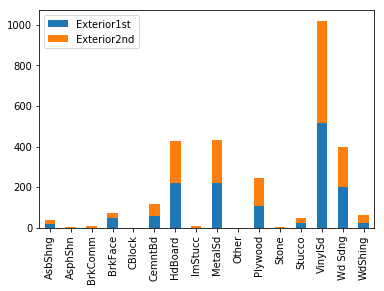

In [80]:
mapping={ 'Wd Shng':'WdShing','Brk Cmn':'BrkComm','CmentBd':'CemntBd' }
X.Exterior2nd.replace(mapping,inplace=True)
X_test.Exterior2nd.replace(mapping,inplace=True)
a=X.Exterior1st.value_counts()
b=X.Exterior2nd.value_counts()
c=pd.concat([a,b],axis=1,sort=True)
c.plot.bar(stacked=True)

In [81]:
'''mapping={ 'AsphShn':'Wd Sdng','BrkComm':'AsbShng','CBlock':'AsbShng','ImStucc':'CemntBd','Other':'CemntBd','Stone':'Stucco' }
X.Exterior1st.replace(mapping,inplace=True)
X_test.Exterior1st.replace(mapping,inplace=True)
X.Exterior2nd.replace(mapping,inplace=True)
X_test.Exterior2nd.replace(mapping,inplace=True)'''
dummies=pd.get_dummies(X.Exterior1st,prefix='Ext1')
dummies['Ext1_Other']=0
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.Exterior1st,prefix='Ext1')
dummies['Ext1_ImStucc']=0
dummies['Ext1_Stone']=0
dummies['Ext1_Other']=0
X_test=pd.concat([X_test,dummies],axis=1)
dummies=pd.get_dummies(X.Exterior2nd,prefix='Ext2')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.Exterior2nd,prefix='Ext2')
dummies['Ext2_Other']=0
X_test=pd.concat([X_test,dummies],axis=1)
exteriors=X.Exterior2nd.unique()
for ext in exteriors:
    X['Ext_'+ext]=((X['Ext1_'+ext]+X['Ext2_'+ext])>0)*1
    X_test['Ext_'+ext]=((X_test['Ext1_'+ext]+X_test['Ext2_'+ext])>0)*1
    X.drop(['Ext1_'+ext,'Ext2_'+ext],axis=1,inplace=True)
    X_test.drop(['Ext1_'+ext,'Ext2_'+ext],axis=1,inplace=True)
#X.head()

In [82]:
#X_test.head()

In [83]:
#X.groupby('MasVnrType')['SalePrice'].mean().plot.bar()

In [84]:
#X.MasVnrType.replace({'BrkCmn':'None'},inplace=True)
#X_test.MasVnrType.replace({'BrkCmn':'None'},inplace=True)
dummies=pd.get_dummies(X.MasVnrType,prefix='MVT')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.MasVnrType,prefix='MVT')
X_test=pd.concat([X_test,dummies],axis=1)
mapping={ 'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0 }
X.ExterQual.replace(mapping,inplace=True)
X_test.ExterQual.replace(mapping,inplace=True)
X.ExterCond.replace(mapping,inplace=True)
X_test.ExterCond.replace(mapping,inplace=True)
#X.head()
#X.shape,X_test.shape

In [85]:
#X_test.head()

In [86]:
dummies=pd.get_dummies(X.Foundation,prefix='Foundation')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.Foundation,prefix='Foundation')
X_test=pd.concat([X_test,dummies],axis=1)
X['NoBsmt']=(X.BsmtQual=='NoBsmt')*1
X_test['NoBsmt']=(X_test.BsmtQual=='NoBsmt')*1
mapping={ 'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0,'NoBsmt':-1 }
X.BsmtQual.replace(mapping,inplace=True)
X_test.BsmtQual.replace(mapping,inplace=True)
X.BsmtCond.replace(mapping,inplace=True)
X_test.BsmtCond.replace(mapping,inplace=True)
#X.head()
#X.shape,X_test.shape

In [87]:
#X_test.head()

In [88]:
mapping={ 'Gd':4,'Av':3,'Mn':2,'No':1,'NoBsmt':0 }
X.BsmtExposure.replace(mapping,inplace=True)
X_test.BsmtExposure.replace(mapping,inplace=True)
'''dummies=pd.get_dummies(X.BsmtFinType1,prefix='BFT1')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.BsmtFinType1,prefix='BFT1')
X_test=pd.concat([X_test,dummies],axis=1)
dummies=pd.get_dummies(X.BsmtFinType2,prefix='BFT2')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.BsmtFinType2,prefix='BFT2')
X_test=pd.concat([X_test,dummies],axis=1)
fintypes=X.BsmtFinType1.unique()
for ft in fintypes:
    X['BFT_'+ft]=((X['BFT1_'+ft]+X['BFT2_'+ft])>0)*1
    X_test['BFT_'+ft]=((X_test['BFT1_'+ft]+X_test['BFT2_'+ft])>0)*1
    X.drop(['BFT1_'+ft,'BFT2_'+ft],axis=1,inplace=True)
    X_test.drop(['BFT1_'+ft,'BFT2_'+ft],axis=1,inplace=True)'''
X['BsmtFinSF']=X.BsmtFinSF1+X.BsmtFinSF2
X_test['BsmtFinSF']=X_test.BsmtFinSF1+X_test.BsmtFinSF2
#X.head()

In [89]:
mapping={'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBsmt':0}
X.BsmtFinType1.replace(mapping,inplace=True)
X_test.BsmtFinType1.replace(mapping,inplace=True)
X.BsmtFinType2.replace(mapping,inplace=True)
X_test.BsmtFinType2.replace(mapping,inplace=True)
#X.shape,X_test.shape

In [90]:
#X_test.head()

In [91]:
#X.Heating.value_counts().plot.bar()

In [92]:
'''X['Heating']=(X.Heating=='GasA')*1
X_test['Heating']=(X_test.Heating=='GasA')*1'''
dummies=pd.get_dummies(X.Heating,prefix='Heating')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.Heating,prefix='Heating')
dummies['Heating_OthW']=0
dummies['Heating_Floor']=0
dummies.sort_index(axis=1,inplace=True)
X_test=pd.concat([X_test,dummies],axis=1)
mapping={ 'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0 }
X.HeatingQC.replace(mapping,inplace=True)
X_test.HeatingQC.replace(mapping,inplace=True)
X.loc[:,'CentralAir']=le.fit_transform(X.CentralAir.values)
X_test.loc[:,'CentralAir']=le.transform(X_test.CentralAir.values)
#X.groupby('Electrical')['SalePrice'].mean().plot.bar()
#X.head()

In [93]:
#X_test.head()

In [94]:
'''mapping={ 'FuseP':'FuseF','Mix':'FuseF' }
X.Electrical.replace(mapping,inplace=True)
X_test.Electrical.replace(mapping,inplace=True)'''
dummies=pd.get_dummies(X.Electrical,prefix='Electrical')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.Electrical,prefix='Electrical')
dummies['Electrical_Mix']=0
dummies.sort_index(axis=1,inplace=True)
X_test=pd.concat([X_test,dummies],axis=1)
#X.iloc[:,38:].head()
#X.head()

In [95]:
#X_test.iloc[:,38:].head()
#X_test.head()

In [96]:
X['TotalSF']=X['TotalBsmtSF']+X['1stFlrSF']+X['2ndFlrSF']
X_test['TotalSF']=X_test['TotalBsmtSF']+X_test['1stFlrSF']+X_test['2ndFlrSF']
X['TotalFinSF']=X['TotalSF']-X['BsmtUnfSF']
X_test['TotalFinSF']=X_test['TotalSF']-X_test['BsmtUnfSF']
X['BsmtBath']=X['BsmtFullBath']+X['BsmtHalfBath']*0.5
X_test['BsmtBath']=X_test['BsmtFullBath']+X_test['BsmtHalfBath']*0.5
X['GradeBath']=X['FullBath']+X['HalfBath']*0.5
X_test['GradeBath']=X_test['FullBath']+X_test['HalfBath']*0.5
X['TotalBath']=X['BsmtBath']+X['GradeBath']
X_test['TotalBath']=X_test['BsmtBath']+X_test['GradeBath']
#X.head()

In [97]:
#X_test.head()

In [98]:
mapping={ 'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0 }
X.KitchenQual.replace(mapping,inplace=True)
X_test.KitchenQual.replace(mapping,inplace=True)
#X.groupby('Functional')['SalePrice'].mean().plot.bar()

In [99]:
mapping= {'Maj1':2,'Maj2':1,'Min1':5,'Min2':4,'Mod':3,'Sev':0,'Typ':6}
X.Functional.replace(mapping,inplace=True)
X_test.Functional.replace(mapping,inplace=True)
#X.groupby('Functional')['SalePrice'].mean().plot.bar()

In [100]:
mapping={ 'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0,'NoFire':-1 }
X.FireplaceQu.replace(mapping,inplace=True)
X_test.FireplaceQu.replace(mapping,inplace=True)
#X.iloc[:,38:].head()

In [101]:
#X_test.iloc[:,38:].head()
#X.shape,X_test.shape

In [102]:
#X.groupby('GarageType')['SalePrice'].mean().plot.bar()

In [103]:
X['NoGarage']=(X.GarageType=='NoGarage')*1
X_test['NoGarage']=(X_test.GarageType=='NoGarage')*1
'''mapping={ 'CarPort':'NoGarage','2Types':'Basment' }
X.GarageType.replace(mapping,inplace=True)
X_test.GarageType.replace(mapping,inplace=True)'''
dummies=pd.get_dummies(X.GarageType,prefix='GarageType')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.GarageType,prefix='GarageType')
X_test=pd.concat([X_test,dummies],axis=1)
mapping={'Fin':3,'RFn':2,'Unf':1,'NoGarage':0}
X.GarageFinish.replace(mapping,inplace=True)
X_test.GarageFinish.replace(mapping,inplace=True)
mapping={ 'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0,'NoGarage':-1 }
X.GarageQual.replace(mapping,inplace=True)
X_test.GarageQual.replace(mapping,inplace=True)
X.GarageCond.replace(mapping,inplace=True)
X_test.GarageCond.replace(mapping,inplace=True)
#X.iloc[:,38:].head()

In [104]:
#X_test.iloc[:,38:].head()
#X.shape,X_test.shape

In [105]:
#X.groupby('PavedDrive')['SalePrice'].mean().plot.bar()

In [106]:
X.loc[:,'PavedDrive']=le.fit_transform(X.PavedDrive.values)
X_test.loc[:,'PavedDrive']=le.transform(X_test.PavedDrive.values)
mapping={'Ex':3,'Gd':2,'Fa':1,'NoPool':0}
X.PoolQC.replace(mapping,inplace=True)
X_test.PoolQC.replace(mapping,inplace=True)
'''dummies=pd.get_dummies(X.Fence,prefix='Fence')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.Fence,prefix='Fence')
X_test=pd.concat([X_test,dummies],axis=1)
X.iloc[:,38:].head()'''

"dummies=pd.get_dummies(X.Fence,prefix='Fence')\nX=pd.concat([X,dummies],axis=1)\ndummies=pd.get_dummies(X_test.Fence,prefix='Fence')\nX_test=pd.concat([X_test,dummies],axis=1)\nX.iloc[:,38:].head()"

In [107]:
mapping={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NoFence':0}
X.Fence.replace(mapping,inplace=True)
X_test.Fence.replace(mapping,inplace=True)
#X.shape,X_test.shape

In [108]:
#X_test.iloc[:,38:].head()

In [109]:
#X.groupby('MoSold')['SalePrice'].mean().plot.bar()

In [110]:
mapping={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
X.MoSold.replace(mapping,inplace=True)
X_test.MoSold.replace(mapping,inplace=True)
#X.groupby('MoSold')['SalePrice'].mean().plot.bar()
dummies=pd.get_dummies(X.MoSold,prefix='MoSold')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.MoSold,prefix='MoSold')
X_test=pd.concat([X_test,dummies],axis=1)
#X.shape,X_test.shape

In [111]:
dummies=pd.get_dummies(X.YrSold,prefix='YrSold')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.YrSold,prefix='YrSold')
X_test=pd.concat([X_test,dummies],axis=1)
#X.groupby('SaleType')['SalePrice'].mean().plot.bar()

In [112]:
'''mapping={'CWD':'WD','Con':'New','ConLD':'COD','ConLI':'WD','ConLw':'COD','Oth':'COD'}
X.SaleType.replace(mapping,inplace=True)
X_test.SaleType.replace(mapping,inplace=True)'''
dummies=pd.get_dummies(X.SaleType,prefix='SaleType')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.SaleType,prefix='SaleType')
X_test=pd.concat([X_test,dummies],axis=1)
#X.groupby('SaleCondition')['SalePrice'].mean().plot.bar()
#X.shape,X_test.shape

In [113]:
'''X.SaleCondition.replace({'AdjLand':'Abnorml'},inplace=True)
X_test.SaleCondition.replace({'AdjLand':'Abnorml'},inplace=True)'''
dummies=pd.get_dummies(X.SaleCondition,prefix='SaleCondition')
X=pd.concat([X,dummies],axis=1)
dummies=pd.get_dummies(X_test.SaleCondition,prefix='SaleCondition')
X_test=pd.concat([X_test,dummies],axis=1)
#X.iloc[:,38:].head()
#X.shape,X_test.shape

In [114]:
#X_test.iloc[:,38:].head()

In [115]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,NoGarage,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MoSold_Apr,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,1,0,3,3,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,3,2,1,6,706,1,0,150,856,GasA,4,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,RL,80.0,9600,1,0,3,3,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,3,2,4,5,978,1,0,284,1262,GasA,4,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,RL,68.0,11250,1,0,2,3,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,3,2,2,6,486,1,0,434,920,GasA,4,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,RL,60.0,9550,1,0,2,3,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,WdShing,None,0.0,2,2,BrkTil,2,3,1,5,216,1,0,540,756,GasA,3,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,84.0,14260,1,0,2,3,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,3,2,3,6,655,1,0,490,1145,GasA,4,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [116]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,NoGarage,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MoSold_Apr,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,RH,80.0,11622,1,0,3,3,Inside,0,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,2,2,1,3,468.0,2,144.0,270.0,882.0,GasA,2,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,20,RL,81.0,14267,1,0,2,3,Corner,0,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2,2,CBlock,2,2,1,5,923.0,1,0.0,406.0,1329.0,GasA,2,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,60,RL,74.0,13830,1,0,2,3,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,3,2,1,6,791.0,1,0.0,137.0,928.0,GasA,3,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,60,RL,78.0,9978,1,0,2,3,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,2,2,PConc,2,2,1,6,602.0,1,0.0,324.0,926.0,GasA,4,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,120,RL,43.0,5005,1,0,2,1,Inside,0,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,2,PConc,3,2,1,5,263.0,1,0.0,1017.0,1280.0,GasA,4,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [117]:
column_drop=['Id','MSZoning','LotConfig','Condition1','Condition2','HouseStyle','RoofStyle']
X.drop(column_drop,axis=1,inplace=True)
X_test.drop(column_drop,axis=1,inplace=True)
X.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LandSlope,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,NoGarage,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MoSold_Apr,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,0,3,3,0,CollgCr,1Fam,7,5,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,3,2,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,1,0,3,3,0,Veenker,1Fam,6,8,1976,1976,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,3,2,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,1,0,2,3,0,CollgCr,1Fam,7,5,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,3,2,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,1,0,2,3,0,Crawfor,1Fam,7,5,1915,1970,CompShg,Wd Sdng,WdShing,None,0.0,2,2,BrkTil,2,3,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,1,0,2,3,0,NoRidge,1Fam,8,5,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,3,2,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [118]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LandSlope,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,NoGarage,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MoSold_Apr,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,1,0,3,3,0,NAmes,1Fam,5,6,1961,1961,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,2,2,1,3,468.0,2,144.0,270.0,882.0,GasA,2,1,SBrkr,896,0,0,896,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,1,0,2,3,0,NAmes,1Fam,6,6,1958,1958,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2,2,CBlock,2,2,1,5,923.0,1,0.0,406.0,1329.0,GasA,2,1,SBrkr,1329,0,0,1329,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,1,0,2,3,0,Gilbert,1Fam,5,5,1997,1998,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,3,2,1,6,791.0,1,0.0,137.0,928.0,GasA,3,1,SBrkr,928,701,0,1629,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,1,0,2,3,0,Gilbert,1Fam,6,6,1998,1998,CompShg,VinylSd,VinylSd,BrkFace,20.0,2,2,PConc,2,2,1,6,602.0,1,0.0,324.0,926.0,GasA,4,1,SBrkr,926,678,0,1604,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,1,0,2,1,0,StoneBr,TwnhsE,8,5,1992,1992,CompShg,HdBoard,HdBoard,None,0.0,3,2,PConc,3,2,1,5,263.0,1,0.0,1017.0,1280.0,GasA,4,1,SBrkr,1280,0,0,1280,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [119]:
column_drop=['Exterior1st','Exterior2nd','MasVnrType','Foundation','Electrical','GarageType','MiscFeature']
X.drop(column_drop,axis=1,inplace=True)
X_test.drop(column_drop,axis=1,inplace=True)
X.iloc[:,40:].head()

,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neigh_Blmngtn,Neigh_Blueste,Neigh_BrDale,Neigh_BrkSide,...,NoGarage,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MoSold_Apr,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,8,6,0,-1,2003.0,2,2,548,2,2,2,0,61,0,0,0,0,0,0,0,Feb,2008,WD,Normal,208500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,6,6,1,2,1976.0,2,2,460,2,2,2,298,0,0,0,0,0,0,0,0,May,2007,WD,Normal,181500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,6,6,1,2,2001.0,2,2,608,2,2,2,0,42,0,0,0,0,0,0,0,Sep,2008,WD,Normal,223500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,7,6,1,3,1998.0,1,3,642,2,2,2,0,35,272,0,0,0,0,0,0,Feb,2006,WD,Abnorml,140000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,3,9,6,1,2,2000.0,2,3,836,2,2,2,192,84,0,0,0,0,0,0,0,Dec,2008,WD,Normal,250000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [120]:
X_test.iloc[:,40:].head()

,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neigh_Blmngtn,Neigh_Blueste,Neigh_BrDale,Neigh_BrkSide,Neigh_ClearCr,...,NoGarage,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MoSold_Apr,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2,5,6,0,-1,1961.0,1,1.0,730.0,2,2,2,140,0,0,0,120,0,0,3,0,Jun,2010,WD,Normal,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3,6,6,0,-1,1958.0,1,1.0,312.0,2,2,2,393,36,0,0,0,0,0,0,12500,Jun,2010,WD,Normal,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,6,6,1,2,1997.0,3,2.0,482.0,2,2,2,212,34,0,0,0,0,0,3,0,Mar,2010,WD,Normal,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,7,6,1,3,1998.0,3,2.0,470.0,2,2,2,360,36,0,0,0,0,0,0,0,Jun,2010,WD,Normal,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,3,5,6,0,-1,1992.0,2,2.0,506.0,2,2,2,0,82,0,0,144,0,0,0,0,Jan,2010,WD,Normal,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [121]:
column_drop=['YrSold','SaleType','SaleCondition','GarageYrBlt','Neighborhood','BldgType','RoofMatl','Heating','MoSold']
X.drop(column_drop,axis=1,inplace=True)
X_test.drop(column_drop,axis=1,inplace=True)
Y=np.log1p(X.SalePrice)
#Y=X.SalePrice
X.drop('SalePrice',axis=1,inplace=True)

In [122]:
'''pca=PCA(n_components=200)
X=pca.fit_transform(X)
X_test=pca.transform(X_test)
X=pca.inverse_transform(X)
X_test=pca.inverse_transform(X_test)'''

'pca=PCA(n_components=200)\nX=pca.fit_transform(X)\nX_test=pca.transform(X_test)\nX=pca.inverse_transform(X)\nX_test=pca.inverse_transform(X_test)'

In [123]:
'''mu=X.mean()
sigma=X.std()
X=(X-mu)/sigma
X_test=(X_test-mu)/sigma'''

'mu=X.mean()\nsigma=X.std()\nX=(X-mu)/sigma\nX_test=(X_test-mu)/sigma'

In [124]:
#X.iloc[:,40:].head()

In [125]:
#X_test.iloc[:,40:].head()

In [126]:
#Y.head()

In [127]:
#X.iloc[:,75:].head()

In [128]:
#X_test.iloc[:,75:].head()

In [129]:
X.shape,X_test.shape

((1451, 210), (1459, 210))

In [130]:
Y.shape

(1451,)

In [131]:
lst=list(range(56))
to_extend=[153,165,166,167,168,169]
lst.extend(to_extend)

In [132]:
skew_features=X.iloc[:,lst].apply(lambda x:skew(x)).sort_values(ascending=False)
skew_features_test=X_test.iloc[:,lst].apply(lambda x:skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skew_features})
skewness_test = pd.DataFrame({'Skew' :skew_features_test})
skewness.head()

,Skew
MiscVal,24.444051
PoolQC,20.625942
PoolArea,17.474180
3SsnPorch,10.261120
LowQualFinSF,8.973279


In [133]:
skewness = skewness[abs(skewness) > 0.5].dropna()
feats=skewness.index.values.tolist()
lam=0.1
for feat in feats:
    X[feat]=boxcox1p(X[feat], lam)
    X_test[feat]=boxcox1p(X_test[feat], lam)

In [134]:
'''pca=PCA(n_components=200)
X=pca.fit_transform(X)
X_test=pca.transform(X_test)
X=pca.inverse_transform(X)
X_test=pca.inverse_transform(X_test)'''

'pca=PCA(n_components=200)\nX=pca.fit_transform(X)\nX_test=pca.transform(X_test)\nX=pca.inverse_transform(X)\nX_test=pca.inverse_transform(X_test)'

In [135]:
#X.head()

In [136]:
#X_test.head()

In [137]:
'''model=XGBRegressor()
model.fit(X,Y)
importances=np.sort(model.feature_importances_)
select=SelectFromModel(model,threshold=importances[120],prefit=True)
select_X=select.transform(X)
select_X_test=select.transform(X_test)'''
parameters = {'max_depth':[3],'n_estimators':[3000],'max_features':['sqrt'],'loss':['huber'],'min_samples_leaf':[15],'min_samples_split':[10],'random_state':[0]}
#parameters = {'max_depth':[3],'n_estimators':[200],'reg_lambda':[0.3]}
#parameters = {  }
select_model=GridSearchCV(GradientBoostingRegressor(),parameters,scoring='neg_mean_squared_error',cv=KFold(n_splits=5))
#select_model=XGBRegressor()
select_model.fit(X,Y)
Y_test1=select_model.predict(X_test)
Y_test1=np.exp(Y_test1)-1
#np.mean(np.log(select_model.predict(select_X)/Y)**2)**0.5
((select_model.best_score_)*(-1))**0.5

0.1185039778712615

In [138]:
model=make_pipeline(RobustScaler(),Lasso(0.0004,random_state=0))
rmslerror=(-cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=KFold(n_splits=5)))**0.5
print(rmslerror.mean())
model.fit(X,Y)
Y_test2=np.expm1(model.predict(X_test))

0.10925133428218423


In [139]:
Y_test=(Y_test1+Y_test2)/2

In [140]:
'''parameters = {'max_depth':[3,4],'n_estimators':[2000,3000],'max_features':['sqrt'],'random_state':[0]}
model=GridSearchCV(RandomForestRegressor(),parameters,scoring='neg_mean_squared_error',cv=KFold(n_splits=5))
model.fit(X,Y)
Y_test=np.expm1(model.predict(X_test))
#np.mean(np.log(model.predict(X)/Y)**2)**0.5
((model.best_score_)*(-1))**0.5'''

"parameters = {'max_depth':[3,4],'n_estimators':[2000,3000],'max_features':['sqrt'],'random_state':[0]}\nmodel=GridSearchCV(RandomForestRegressor(),parameters,scoring='neg_mean_squared_error',cv=KFold(n_splits=5))\nmodel.fit(X,Y)\nY_test=np.expm1(model.predict(X_test))\n#np.mean(np.log(model.predict(X)/Y)**2)**0.5\n((model.best_score_)*(-1))**0.5"

In [141]:
'''model=XGBRegressor()
model.fit(X,Y)
Y_test=model.predict(X_test)
Y_test=np.exp(Y_test)-1
np.mean(np.log((np.exp(model.predict(X))-1)/(np.exp(Y)-1))**2)**0.5
#np.mean(np.log(model.predict(X)/Y)**2)**0.5'''

'model=XGBRegressor()\nmodel.fit(X,Y)\nY_test=model.predict(X_test)\nY_test=np.exp(Y_test)-1\nnp.mean(np.log((np.exp(model.predict(X))-1)/(np.exp(Y)-1))**2)**0.5\n#np.mean(np.log(model.predict(X)/Y)**2)**0.5'

In [142]:
submission=pd.DataFrame({'Id':range(1461,2920),'SalePrice':Y_test})
submission.to_csv('submit.csv',index=False)

In [143]:
#dummies=pd.get_dummies(X.MSSubClass,prefix='MSSubClass')
#X=pd.concat([X,dummies],axis=1)
#X.head()

In [144]:
#X_test.MSSubClass.unique()

In [145]:
#X_test.MSSubClass.replace({ 150:120 }, inplace=True)

In [146]:
#dummies=pd.get_dummies(X_test.MSSubClass,prefix='MSSubClass')
#X_test=pd.concat([X_test,dummies],axis=1)
#X_test.head()

In [147]:
#X.groupby('MSZoning')['SalePrice'].mean().plot.bar()

In [148]:
#X.MSZoning.value_counts().plot.bar()

In [149]:
#X_test.MSZoning.fillna('RL',inplace=True)
#X_test.MSZoning.unique()

In [150]:
#dummies=pd.get_dummies(X.MSZoning,prefix='MSZoning')
#X=pd.concat([X,dummies],axis=1)
#X.head()

In [151]:
#dummies=pd.get_dummies(X_test.MSZoning,prefix='MSZoning')
#X_test=pd.concat([X_test,dummies],axis=1)
#X_test.head()

In [152]:
#X.LotFrontage.describe()

In [153]:
#X.groupby('LotFrontage')['LotArea'].mean().plot.line()